In [1]:
import smalldatatools.utilities_FitCenter as fc
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import circle_perimeter
from time import time
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [2]:
im = np.load('test/test_data/AvImg_xppo5616_Run716.npy')
mask = np.load('test/test_data/AvImg_xppo5616_Run716_mask.npy')

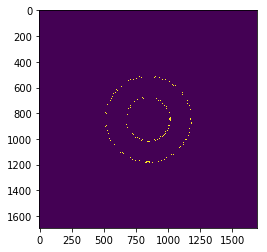

In [5]:
start = time()
edges, sparse_edges = fc.find_edges(im, mask)
plt.figure()
plt.imshow(edges)
plt.show()

In [6]:
r_vals, x, y = fc.iterate_center(sparse_edges)

/Users/aegger/Library/Python/2.7/lib/python/site-packages/numba/ir_utils.py:2030: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'zip_obj' of function '_transform_hough_array'.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "fit_center_new.py", line 66:
@jit(cache=True, nopython=True)
def _transform_hough_array(ar_hough, radii, zip_obj, center_x, center_y, dr, r_low, r_hi):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [8]:
res, ring_info, edges = fc.ransac_result(sparse_edges, [x, y], r_vals)

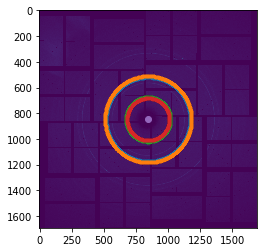

In [13]:
center_x = res['x_cen']
center_y = res['y_cen']
plt.figure()
plt.imshow(im)
for r in res['R']:
    circy, circx = circle_perimeter(int(center_y), int(center_x), int(r), shape=im.shape)
    plt.scatter(circy, circx, s=5)
plt.scatter(center_x, center_y)
plt.show()